In [1]:
import os
import csv
import json

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

def save_fig(filename):
    new_filename = 'plots/' + filename.replace(' ', '-').lower()
    plt.savefig(new_filename, bbox_inches = 'tight')

In [3]:
DATASETS = ['DMOZ', 'ILP', 'Phishing']

In [4]:
data = {}

for dataset in DATASETS:
    with open(f'results/{dataset.lower()}.json', 'r') as f:
        data[dataset] = json.load(f)
        
data

{'DMOZ': {'LR': {'F1': 0.4761802655757706, 'Val Acc': 0.503225}},
 'ILP': {'LR': {'F1': 0.5781321808415699, 'Val Acc': 0.6907654921020656}},
 'Phishing': {'LR': {'F1': 0.9915851869827594,
   'Val Acc': 0.9942661814974088,
   'Error': 0.0057338185025912446}}}

In [5]:
data_adjusted = {
    'Dataset': [],
    'Model': [],
    'Metric': [],
    'Score': []
}

for dataset in data.keys():
    for model in data[dataset].keys():
        for metric, val in data[dataset][model].items():
            data_adjusted['Dataset'].append(dataset)
            data_adjusted['Model'].append(model)
            data_adjusted['Metric'].append(metric)
            data_adjusted['Score'].append(val)

In [6]:
df = pd.DataFrame.from_dict(data_adjusted)
df

,Dataset,Model,Metric,Score
0,DMOZ,LR,F1,0.476180
1,DMOZ,LR,Val Acc,0.503225
2,ILP,LR,F1,0.578132
3,ILP,LR,Val Acc,0.690765
4,Phishing,LR,F1,0.991585
5,Phishing,LR,Val Acc,0.994266
6,Phishing,LR,Error,0.005734


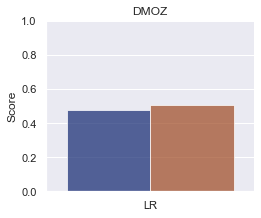

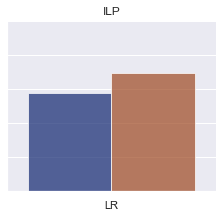

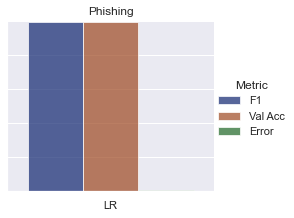

In [7]:
height = 3
aspect = 1.2


for i, dataset in enumerate(DATASETS):
    rows = df[df['Dataset'] == dataset]
    cat_args = {'data': rows, 'kind': 'bar',
                'x': 'Model', 'y': 'Score', 'hue': 'Metric',
                'palette': 'dark', 'alpha': .7,
                'height': height, 'aspect': aspect}

    is_last = i + 1 == len(DATASETS)
    if not is_last:
        cat_args['legend'] = None
    
    sns.catplot(**cat_args)
    
    is_first = i == 0
    if not is_first:  # Remove y label and ticks
        plt.ylabel('')
        ax = plt.gca()
        ax.axes.yaxis.set_ticklabels([])
    
    plt.xlabel('')
    plt.ylim((0, 1))
    plt.title(dataset)
    save_fig(f'{dataset.lower()}.pdf')
    plt.show()

In [8]:
rows = [
    ['DMOZ', 'Baseline', 0.47618],
    ['DMOZ', 'DURC', 0.5229],
    ['ILP', 'Baseline', 0.57813],
    ['ILP', 'DURC', 0.8057]
]

df = pd.DataFrame(rows, columns=['Dataset', 'Model', 'Weighted Avg F1'])
df

,Dataset,Model,Weighted Avg F1
0,DMOZ,Baseline,0.47618
1,DMOZ,DURC,0.52290
2,ILP,Baseline,0.57813
3,ILP,DURC,0.80570


In [9]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

sns.set(font='Tahoma')  # Tahoma is easy to read at small sizes

def save_fig(filename):
    new_filename = 'plots/' + filename.replace(' ', '-').lower()
    plt.savefig(new_filename, bbox_inches = 'tight', facecolor=(1, 1, 1, 0))

In [10]:
cat_args = {'data': rows, 'kind': 'bar',
                'x': 'Model', 'y': 'Score', 'hue': 'Metric',
                'palette': 'dark', 'alpha': .7,
                'height': height, 'aspect': aspect}

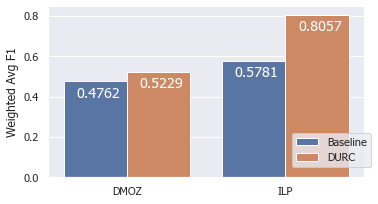

In [11]:
g = sns.catplot(data=df, kind='bar', x='Dataset', y='Weighted Avg F1', hue='Model',
                height=3, aspect=1.7, legend_out=False)
plt.xlabel('')

plt.legend(bbox_to_anchor=(0.77, 0.26), loc=2, borderaxespad=0.)


ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.08, 
            p.get_height() - 0.08,  #1.02, 
           '{0:.4f}'.format(p.get_height()),
            color='white', 
            rotation='horizontal', 
            size='large')


save_fig('durc-score.pdf')
plt.show()